# Question 3.7 Task (b)


In [ ]:
import config as c
import numpy as np
import matplotlib.pyplot as plt
from simulation import solve_simulation
from opt_initial_values import inital_values
from opt_diags_gen import diags_gen_backwards_euler

from plots import plot_diff_times

# nicer looking default plots (according to your github)
plt.style.use('bmh')

In [2]:
Us = []
n_sim = 40+1 # amounts of simulation that will be done
# center and sides define the interval in which V_appl is varied (linear)
center = -46.9 * c.milli 
sides = 0.05 * c.milli
v_values = np.linspace(center - sides, center + sides ,n_sim)

print("v_values in mV:",v_values/c.milli)

for v_appl in v_values:
    inital_distr = inital_values(v_appl)
    Us.append(solve_simulation(inital_distr,diags_gen_backwards_euler))

-46.85 mV


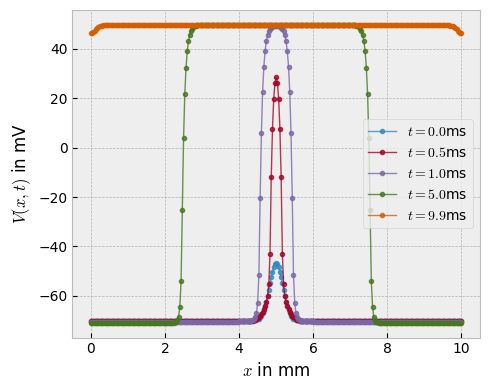

In [14]:
ts = [0,50,100,500,c.n_t-10]
filename = "v_appl_high"

for i_v_appl in [40]:
    U = Us[i_v_appl]
    print(f"V_appl = {v_values[i_v_appl]/c.milli:.2f} mV")
    plot_diff_times(
        U,
        t_diff_times=ts,
        log=False,
        alpha=0.8,
        legend=True,
        filename=filename
        )

0.00999


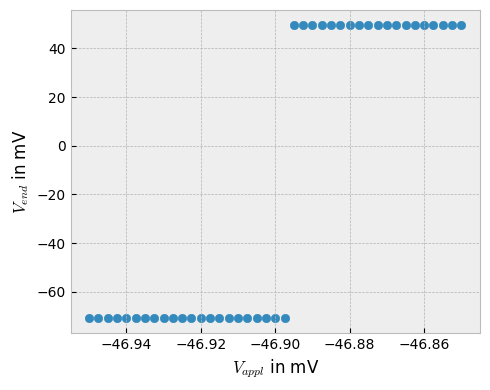

0 -0.0708724222993362
1 -0.07087233899822881
2 -0.07087225172725536
3 -0.07087216006555593
4 -0.07087206352147843
5 -0.07087196151575353
6 -0.07087185335935431
7 -0.07087173822388912
8 -0.0708716151012885
9 -0.07087148274777673
10 -0.07087133960415132
11 -0.07087118367923637
12 -0.07087101237400434
13 -0.0708708222059907
14 -0.0708706083574332
15 -0.07087036389180296
16 -0.07087007829587119
17 -0.07086973450340862
18 -0.0708693019929743
19 -0.07086871744596807
20 -0.07086780998375977
21 -0.07086566741784103
22 0.04972623574144469
23 0.04972623574144469
24 0.04972623574144469
25 0.04972623574144469
26 0.04972623574144469
27 0.04972623574144469
28 0.04972623574144469
29 0.04972623574144469
30 0.04972623574144469
31 0.04972623574144469
32 0.04972623574144469
33 0.04972623574144469
34 0.04972623574144469
35 0.04972623574144469
36 0.04972623574144469
37 0.04972623574144469
38 0.04972623574144469
39 0.04972623574144469
40 0.04972623574144469


In [18]:
# plot endvoltage against v_appl
# volatage in the middle at the end
endvoltages = []
i_t = c.n_t-1
print(i_t*c.delta_t)
for U in Us:

    endvoltages += [U[i_t,int(c.x_0/c.delta_x)]]

plt.style.use('bmh')
fig = plt.figure(figsize=(5,4))
plt.scatter(v_values/c.milli,np.array(endvoltages)/c.milli)
plt.ylabel("$V_{end}$ in mV")
plt.xlabel("$V_{appl}$ in mV")
#plt.axvline(c.v_mem,label="$V_{mem}$",alpha=0.5)
plt.tight_layout()
#plt.legend()
plt.savefig("images/v_end_vs_v_appl.pdf")
plt.show()
for i in range(len(endvoltages)):
    print(i,endvoltages[i])

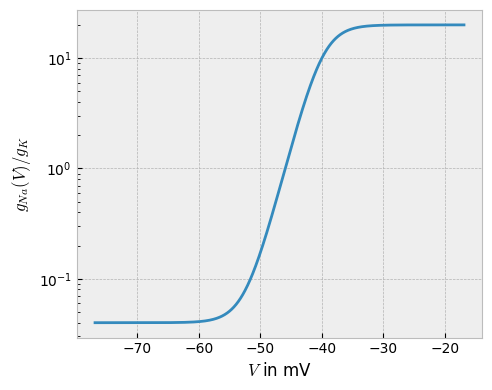

In [20]:
from opt_right_side_functions import g_na_g_k
sides = 30 * c.milli
x = np.linspace(center - sides, center + sides ,1000)
#x = np.linspace(-1e3,1e4,1000)

plt.style.use('bmh')
plt.figure(figsize=(5,4))
plt.plot(x/c.milli,g_na_g_k(x))
plt.ylabel("$g_{Na}(V)/g_K$")
plt.xlabel("$V$ in mV")
plt.tight_layout()
plt.yscale("log")
plt.savefig("images/g_na_vs_v.pdf")
plt.show()
